In [176]:
# Clear all variables
%reset -f
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
import time
from datetime import datetime
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")



***Essential Numpy Moves***

**E1:**

Create a 1 000 000‑sample vector of i.i.d. 𝒩(0, 1) numbers. 2. Re‑create it as float32 without an explicit loop.

In [5]:
x64 = np.random.standard_normal((1000000,1)) # produce 1 million "independent and identically distributed" (iid) random numbers.
print(x64[1:5])
x32 = x64.astype(np.float32) # convert to 32 bit float

[[-0.29274736]
 [ 0.74768368]
 [ 0.83232078]
 [ 0.06265928]]



**E2:**

Turn a 100 × 100 matrix into a 10 × 10 × 100 “batch cube” where each frontal slice is 10 × 10

In [6]:
X = np.random.standard_normal((100,100)) # produce 100 x 100 iid random numbers.
Y = X.reshape(10,10,100)

**E3**

Compute all pairwise dot‑products of 100 random 3‑D vectors with and without a for‑loop.

In [9]:
N = 100
V = np.zeros((N,N), int)

# first with a for loop
v1 = np.random.randint(1,10,(N,3))
start_time_1 = time.time()
for i in range(N):
    for j in range(N):
        V[i,j] = np.dot(v1[i],v1[j].T)
end_time_1 = time.time()


# now with einsum
start_time_2 = time.time()
d2 = np.einsum('ik,jk->ij', v1, v1)
end_time_2 = time.time()


execution_time_1 = end_time_1 - start_time_1
execution_time_2 = end_time_2 - start_time_2
ex_diff = execution_time_1 - execution_time_2
print(f"Execution time difference in for loop vs einsum: {ex_diff} seconds")

Execution time difference in for loop vs einsum: 0.039880990982055664 seconds


**E3**

Compute the product of 

1) Two matrices
2) Matrix with a vector
3) Batched matrix multiplication
4) Using broadcastring compute the product of a batch of matrices with a single matrix

In [11]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
v = np.array([3, 6])

C = np.einsum('ij,jk->ik', A, B)  # Matrix multiplication using einsum
D = np.matmul(A, B)  # Matrix multiplication using matmul
print(C==D) # Check if the results are the same

X1 = np.einsum('ij,j -> i', A, v) 
X2 = np.matmul(A, v)
X1-X2 # Check if the results are the same

D = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
E = np.array([[[9, 8], [7, 6]], [[5, 4], [3, 2]]])

X3 = np.matmul(D, E)
print(X3)

F = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
G = np.array([[1, 2], [3, 4]])

result = np.matmul(F, G)
print(result)


[[ True  True]
 [ True  True]]
[[[23 20]
  [55 48]]

 [[43 32]
  [59 44]]]
[[[ 7 10]
  [15 22]]

 [[23 34]
  [31 46]]]


**E3**

Generate 100 paths of geometric Brownian motion, each with 1000 timesteps, return a vector of pathwise means in one line.

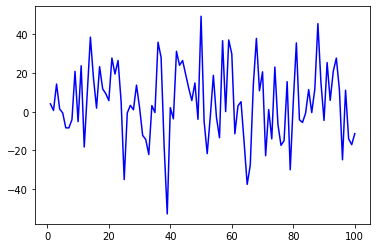

In [44]:
y = np.random.standard_normal((100, 1000)) # produce 100 x 1000 iid random numbers (increments)
cum_sum = np.cumsum(y, axis=1) # cumulative sum along the second axis
mean_cum_sum = np.mean(cum_sum, axis=1) # mean of the cumulative sum along the second axis

# in  one line
y = np.random.default_rng(22).standard_normal((100,1000)).cumsum(1).mean(1)
x = range(1,101)
plt.plot(x, y, label='Mean of Cumulative Sum', color='blue')

## Black–Scholes partial-differential equation 

Analytically solve the BS equations for a European option.

---

***The Black–Scholes Model in PDE Form***

### 1.1 Core assumptions  
1. **Underlying dynamics** – The (discounted) stock price follows *geometric Brownian motion*  
   $$dS_t = (r-q)\,S_t\,dt + \sigma S_t\,dW_t ,$$
   with constant drift $(r-q)$ and volatility $(\sigma).$
2. **No arbitrage & frictionless markets** – You can trade continuously, borrow/lend at the risk-free rate $r$, and short without costs.  
3. **European payoff** – The option’s payoff depends only on $S_T$ at a fixed expiry $T$.  

### 1.2 Deriving the pricing PDE  
Form a self-financing portfolio $\Pi = V - \Delta S$ that is *locally risk-free* by choosing $\Delta = \frac{\partial V}{\partial S}$.  
Applying Itô’s lemma to $V(t,S_t)$ and equating the portfolio’s drift to the risk-free rate yields the **Black–Scholes PDE** 

$$
\boxed{\;
\frac{\partial V}{\partial t} + \tfrac12\sigma^{2}S^{2}\frac{\partial^{2}V}{\partial S^{2}}
      + (r-q)S\frac{\partial V}{\partial S} \;-\; rV \;=\; 0\;}
$$

with terminal condition $V(T,S) = \text{payoff}(S)$.  

---

***2 Closed-Form Solution for a European Call / Put***

Solving the PDE with payoff $C(T,S)=\max(S-K,0)$ (call) or $P(T,S)=\max(K-S,0)$ (put) gives  

$$
\begin{aligned}
C &= S e^{-qT} N(d_1) - K e^{-rT} N(d_2),\\[4pt]
P &= K e^{-rT} N(-d_2) - S e^{-qT} N(-d_1),
\end{aligned}
$$
where  
$$
d_{1,2} = \frac{\ln(S/K) + (r-q \pm \tfrac12\sigma^2)T}{\sigma\sqrt{T}},\qquad
N(\cdot)=\text{standard normal CDF}.
$$
and 
$$
N'(x)=\frac{1}{\sqrt{2\pi}}e^{-x^{2}/2}, \text{ is the standard normal PDF}
$$
Let us plot the CDF and PDF for the normal distribution different values of $\mu$ and $\sigma$ below to gain some intuition

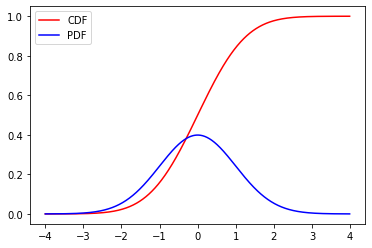

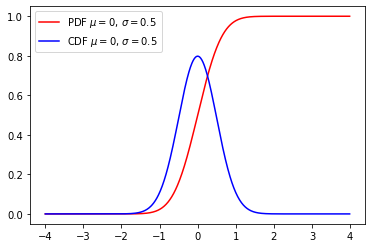

In [ ]:
y = np.random.standard_normal((100, 1))
x = np.arange(-4, 4, 0.01)
plt.figure()
plt.plot(x,norm.cdf(x), label='CDF', color='red') # CDF of standard normal distribution with mean=0 and std=1
plt.plot(x, norm.pdf(x), label='PDF', color='blue')
plt.legend()

plt.figure()
plt.plot(x,norm.cdf(x,0,0.5), label='PDF $\mu=0$, $\sigma=0.5$',color='red') # PDF of normal distribution with mean=0 and std=0.1
plt.plot(x,norm.pdf(x,0,0.5), label='CDF $\mu=0$, $\sigma=0.5$',color='blue') # CDF of normal distribution with mean=0 and std=0.1
plt.legend()

## 3 Greeks: Formulas, Units, and Intuition  

| Greek | Definition | Closed-form (call) | Units | Practical meaning |
|-------|-------------|--------------------|-------|-------------------|
| **Delta** $\displaystyle \Delta = \frac{\partial V}{\partial S}$ | Sensitivity to an *infinitesimal* change in spot price | $\displaystyle e^{-qT}N(d_1)$ | dimensionless | **Hedge ratio** – hold $\Delta$ shares per option to neutralise first-order price moves. |
| **Gamma** $\displaystyle \Gamma = \frac{\partial^{2} V}{\partial S^{2}}$ | Curvature of price vs. spot | $\displaystyle \frac{e^{-qT}N'(d_1)}{S\sigma\sqrt{T}}$ | 1/price | Measures how *Delta* changes as $S$ moves; large near-ATM, short-dated.  Drives *convexity* benefits and risk of delta-hedging error. |
| **Vega** $\displaystyle \nu = \frac{\partial V}{\partial \sigma}$ | Volatility sensitivity | $\displaystyle S e^{-qT} N'(d_1)\sqrt{T}$ | price per vol-point | How much the option’s value moves per 1 % absolute change in σ.  Central for volatility trading. |
| **Theta** $\displaystyle \Theta = -\frac{\partial V}{\partial T}$ | Time-decay (negative for long calls/puts) | $\displaystyle -\frac{S e^{-qT} N'(d_1)\sigma}{2\sqrt{T}} - r K e^{-rT} N(d_2) + q S e^{-qT} N(d_1)$ | price / year | P/L from *letting the clock tick*.  Think of it as the “rent you pay” to be long optionality. |
| **Rho** $\displaystyle \rho = \frac{\partial V}{\partial r}$ | Risk-free rate sensitivity | $\displaystyle K T e^{-rT} N(d_2)$ | price / rate-pt | Gain/loss if the term structure shifts; opposite sign for puts. |
| **Psi** $\displaystyle \psi = \frac{\partial V}{\partial q}$ (“dividend-rho”) | Dividend-yield sensitivity | $-S T e^{-qT} N(d_1)$ | price / yield-pt | Relevant for equity indexes with known dividend yield. |

### 3.2 Physics analogies  
| Option Greek | Physics analogue | Commentary |
|--------------|------------------|------------|
| Delta | *Velocity* | First derivative of option “position” with respect to underlying coordinate $S$. |
| Gamma | *Acceleration / curvature* | Determines how “stable” your delta-hedge is – much like higher curvature forces you to adjust more often. |
| Vega | *Susceptibility* | Response to “temperature” of the stochastic process (variance). |
| Theta | *Energy dissipation* | System loses “free energy” (extrinsic value) as time flows. |

---

## 4 Greeks in Risk Management & Trading

| Greek | Typical hedging instrument | Why it matters day-to-day |
|-------|---------------------------|---------------------------|
| Delta | Underlying shares / futures | Neutralise directional exposure. |
| Gamma | Additional options (usually shorter-dated) | Manage the *rate* at which delta changes; high gamma means you must rebalance frequently. |
| Vega  | Options at different strikes/expiries, variance swaps | Express pure volatility views (“vol trading”). |
| Theta | Carry budget / financing | Determines expected daily bleed; options desks quote “theta-dollars” per night. |
| Rho   | Bond futures / swaps | Small for equities but important in FX and rates options. |

In [ ]:
def analytic_greek(S, K, T, sigma, r=0.0, q=0.0,  option_type: str = "call"):
    F = S*np.exp(-q * T)
    B = K*np.exp(-r * T)
    sqrtT  = np.sqrt(T)
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (d1 - sigma * np.sqrt(T))
    if option_type == "call":
        N1 = norm.cdf(d1)
        N2 = norm.cdf(d2)
        N1_prime = norm.pdf(d1)
        price = F*N1 - B*N2
        delta = np.exp(-q * T) * N1
        gamma = np.exp(-q * T) * N1_prime / (S * sigma * sqrtT)
        vega  = S * np.exp(-q * T) * N1_prime * sqrtT
        theta = (-0.5 * S * np.exp(-q * T) * N1_prime * sigma / sqrtT +
                +q * F * N1 - r * B * N2)
        rho   = np.exp(-r * T) * K * T * N2

    elif option_type == "put":
        N1 = norm.cdf(-d1)
        N2 = norm.cdf(-d2)
        N1_prime = norm.pdf(d1)
        price = B*N2 - F*N1 
        delta = -np.exp(-q * T) * N1
        gamma = (np.exp(-q * T) * N1_prime / (S * sigma * sqrtT))
        vega  = S * np.exp(-q * T) * N1_prime * sqrtT
        theta = -(-0.5 * S * np.exp(-q * T) * N1_prime * sigma / sqrtT +
                +q * F * N1 - r * B * N2)
        rho   = -np.exp(-r * T) * K * T * N2

    return price, d1, d2, delta, gamma, theta, vega, rho

In [190]:
[price, d1, d2, delta, gamma, theta, vega, rho] = analytic_greek(100, 100, 0.5, 0.2, 0.02, 0.0,"call")
print(f" price: {price},d1: {d1}, d2: {d2}, delta: {delta}, gamma: {gamma}, theta: {theta}, vega: {vega}, rho: {rho}")
[price, d1, d2, delta, gamma, theta, vega, rho] = analytic_greek(100, 100, 0.5, 0.2, 0.02, 0.0,"put")
print(f" price: {price},d1: {d1}, d2: {d2}, delta: {delta}, gamma: {gamma}, theta: {theta}, vega: {vega}, rho: {rho}")

 price: 6.120654113455842,d1: 0.1414213562373095, d2: -2.7755575615628914e-17, delta: 0.5562314580091424, gamma: 0.027928790169723425, theta: -6.575807867693853, vega: 27.928790169723428, rho: 24.7512458437292
 price: 5.1256374883726465,d1: 0.1414213562373095, d2: -2.7755575615628914e-17, delta: -0.4437685419908576, gamma: 0.027928790169723425, theta: 6.575807867693853, vega: 27.928790169723428, rho: -24.7512458437292


In [214]:
# Test the analytic_greek function with different parameters
S, K = 100, 100
T, sigma = 0.5, 0.2
r=0.02
q=0.0
F = S*np.exp(-q * T)
B = K*np.exp(-r * T)
X = analytic_greek(S, K, T, sigma,r,q, "call")
Y = analytic_greek(S, K, T, sigma,r,q, "put")
lhs = X[0]-Y[0]
rhs = F-B  # r=q=0 in your defaults
print(np.isclose(lhs, rhs, atol=1e-10))
print(np.isclose(X[3]-Y[3], np.exp(-q*T), atol=1e-10)) # delta
print(X[4]>0)
print(X[5]<=0)
print(X[6]>0)
print(X[7]>0)
print(Y[7]<0)


True
True
True
True
True
True
True
